In [1]:
#importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, f1_score, confusion_matrix, accuracy_score

In [2]:
#reading in the data, including all features extracted + Participant Number + Task_Label + Classification
#Task Labels refer to the conditions in the lab, and the classification is either 0 (no speech) or 1 (speech)
df = pd.read_excel('hexoskin_thorax_training_set.xlsx')
df

,Task_Label,insp_dur_mean,insp_dur_sd,exp_dur_mean,exp_dur_sd,insp_amp_mean,insp_amp_sd,exp_amp_mean,exp_amp_sd,insp_flow_mean,...,ie_ratio_sd,duty_cycle_mean,exp_diff_mean,RSP_Symmetry_PeakTrough,RRV_RMSSD,RSP_Rate_Mean,insp_minu_depth,exp_minu_depth,Participant,Classification
0,12.0a,1.651476,0.202622,1.683594,0.156604,2.838371e+07,5.297158e+06,2.801132e+07,5.304442e+06,1.705501e+07,...,0.074256,0.492097,0.127790,0.544108,376.386712,17.890661,5.078033e+08,5.011411e+08,10785,0
1,12.0b,1.641059,0.087626,1.749512,0.152211,3.007262e+07,2.361021e+06,3.051898e+07,2.676608e+06,1.832396e+07,...,0.057593,0.486992,0.201451,0.553490,351.137516,17.519191,5.268479e+08,5.346679e+08,10785,0
2,12.0c,2.121652,0.213602,2.283203,0.213642,4.145074e+07,3.910462e+06,4.186500e+07,3.564286e+06,1.963778e+07,...,0.067618,0.476697,0.199219,0.553576,457.608476,14.258469,5.910241e+08,5.969309e+08,10785,0
3,12.0d,1.778460,0.094830,1.953683,0.213173,3.375909e+07,2.710758e+06,3.373187e+07,2.535948e+06,1.899324e+07,...,0.082441,0.477750,0.285156,0.565102,439.827676,15.663059,5.287706e+08,5.283442e+08,10785,0
4,12.0e,2.011161,0.243663,2.149088,0.213828,3.628928e+07,3.059318e+06,3.653598e+07,3.092634e+06,1.814004e+07,...,0.115349,0.481671,0.159375,0.552415,457.645154,14.412151,5.230067e+08,5.265620e+08,10785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,85,1.446875,0.122088,1.498828,0.200555,3.969908e+07,5.263487e+06,3.972936e+07,7.984288e+06,2.738841e+07,...,0.108475,0.490259,0.203125,0.493820,334.175635,20.438000,8.113698e+08,8.119886e+08,98586,0
2900,87,1.373264,0.823189,1.939236,0.725393,2.686951e+07,2.472549e+07,2.643146e+07,1.682432e+07,1.682912e+07,...,0.893126,0.401725,0.921387,0.468900,1209.145284,18.264397,4.907555e+08,4.827546e+08,98586,1
2901,89,1.421875,0.078178,1.456641,0.117894,3.635269e+07,5.322750e+06,3.546101e+07,5.857152e+06,2.550938e+07,...,0.051696,0.496388,0.106337,0.513122,185.358320,21.246332,7.723613e+08,7.534163e+08,98586,0
2902,91,1.755208,0.529109,2.785156,1.447558,4.342708e+07,1.907822e+07,4.094893e+07,1.914789e+07,2.724807e+07,...,0.283130,0.412197,2.145182,0.480321,3053.223554,14.493729,6.294203e+08,5.935027e+08,98586,1


In [3]:
# checking if there are NaN values in any column and if so, printing the associated Participant & Task_Label
for index, row in df.iterrows():
    if row.isnull().any():
        print(f"NaN value found in row {index}:")
        print(f"Participant: {row['Participant']}, Task_Label: {row['Task_Label']}")
        print(row)


NaN value found in row 1087:
Participant: 34023, Task_Label: 28.0b
Task_Label                            28.0b
insp_dur_mean                       1.46582
insp_dur_sd                        0.073463
exp_dur_mean                       6.691406
exp_dur_sd                         1.019828
insp_amp_mean               86006628.652867
insp_amp_sd                 15737862.747232
exp_amp_mean                82767385.185434
exp_amp_sd                   2758546.113743
insp_flow_mean              58578981.379221
insp_flow_sd                 10027484.32151
exp_flow_mean                12627856.22605
exp_flow_sd                  1713557.918358
ie_ratio_mean                      0.221789
ie_ratio_sd                        0.038857
duty_cycle_mean                    0.180717
exp_diff_mean                      1.193359
RSP_Symmetry_PeakTrough                 NaN
RRV_RMSSD                       1322.717046
RSP_Rate_Mean                      7.438991
insp_minu_depth            639802569.460751
exp_minu_

In [4]:
from sklearn.impute import SimpleImputer
#needed imputations (for the missing neurokit2 values) were already done while preprocessing
#one feature of one segment from a participant was missed, here we just fill that in with SimpleImputer
participant_id = 34023

# filter DataFrame to include only rows belonging to the same participant
participant_df = df[df['Participant'] == participant_id]

# select only the column "RSP_Symmetry_PeakTrough" for imputation
column_name = "RSP_Symmetry_PeakTrough"

# initialize SimpleImputer with strategy = mean
imputer = SimpleImputer(strategy='mean')

# transform the specific column for the participant
participant_column_imputed = imputer.fit_transform(participant_df[[column_name]])

# change the original dataframe with the imputed values for the specific column
df.loc[participant_df.index, column_name] = participant_column_imputed

# verifying NaNs are filled with mean values within the participant for the column (RSP_Symmetry_PeakTrough)
print("NaN values after imputation:")
print(df[df['Participant'] == participant_id][column_name].isnull().sum())


NaN values after imputation:
0


            Feature  Mutual_Information
15    exp_diff_mean            0.300580
3        exp_dur_sd            0.287492
14  duty_cycle_mean            0.282024
17        RRV_RMSSD            0.253531
12    ie_ratio_mean            0.200420
9      insp_flow_sd            0.190086
5       insp_amp_sd            0.145537
7        exp_amp_sd            0.131750
13      ie_ratio_sd            0.131434
2      exp_dur_mean            0.126753


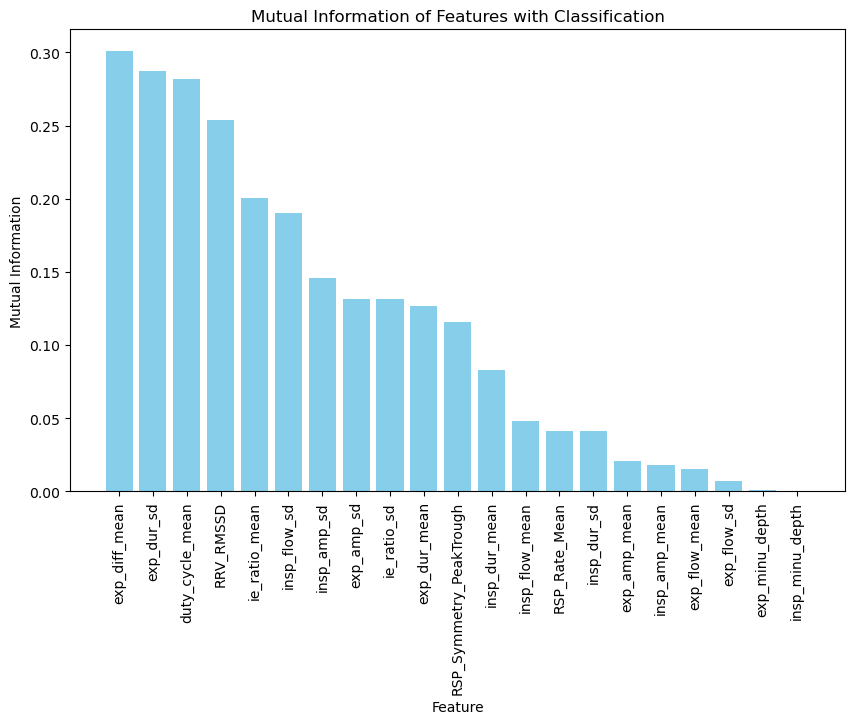

   exp_diff_mean  exp_dur_sd  duty_cycle_mean   RRV_RMSSD  ie_ratio_mean  \
0       0.127790    0.156604         0.492097  376.386712       0.971761   
1       0.201451    0.152211         0.486992  351.137516       0.950939   
2       0.199219    0.213642         0.476697  457.608476       0.913378   
3       0.285156    0.213173         0.477750  439.827676       0.918119   
4       0.159375    0.213828         0.481671  457.645154       0.936229   

   insp_flow_sd   insp_amp_sd    exp_amp_sd  ie_ratio_sd  exp_dur_mean  \
0  1.445912e+06  5.297158e+06  5.304442e+06     0.074256      1.683594   
1  1.034691e+06  2.361021e+06  2.676608e+06     0.057593      1.749512   
2  1.890795e+06  3.910462e+06  3.564286e+06     0.067618      2.283203   
3  1.316481e+06  2.710758e+06  2.535948e+06     0.082441      1.953683   
4  9.634884e+05  3.059318e+06  3.092634e+06     0.115349      2.149088   

  Task_Label  Participant  Classification  
0      12.0a        10785               0  
1      12.

In [5]:
#identifying and plotting the 10 features that have the highest mutual information with the Classification
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# dropping Participant and Classification columns
df_features = df.drop(columns=['Participant', 'Classification', 'Task_Label'])

A = df_features #defining the features to test
b = df['Classification'] #defining the target

# calculating mutual information
mutual_info = mutual_info_classif(A, b)

# making a dataframe to store feature names along with their mutual information statistic
feature_mi_df = pd.DataFrame({'Feature': A.columns, 'Mutual_Information': mutual_info})

# sort features by mutual information in descending order
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

# print the top 10 features
print(feature_mi_df.head(10))

# plot a histogram of the mutual information
plt.figure(figsize=(10, 6))
plt.bar(feature_mi_df['Feature'], feature_mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features with Classification')
plt.xticks(rotation=90)
plt.show()

# putting the top 10 features into a new variable
top_features = feature_mi_df['Feature'][:10].tolist()

# defining the columns to keep (we add the task_label, participant, classification as they will be used
#in the nested cross-validation)
columns_to_keep = top_features + ['Task_Label', 'Participant', 'Classification']

# filtering the dataframe to only keep the columns we want
df = df[columns_to_keep]

# Print the filtered DataFrame
print(df.head())


In [6]:
writer = pd.ExcelWriter('hexoskin_thorax_training_set_10_final.xlsx', engine = 'xlsxwriter')

df.to_excel(writer, index = False, float_format = '%.7f', sheet_name = 'Sheet1')

writer.save()

/var/folders/hp/bbc0951x6v16lx1z1dcbzqtm0000gn/T/ipykernel_51370/1186602059.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
